## Storytelling Through Data Visualization - Aesthetics

### 1. Improving Plot Aesthetics
- a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012

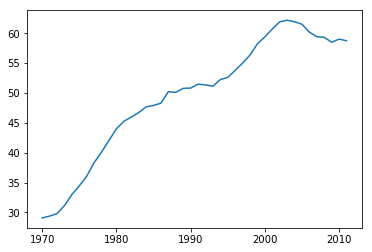

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()